# Project 2: Diet and Disease

Welcome to Project 2!  You will investigate the major causes of death in the world, as well as how one of these causes, heart disease, might be linked to diet!

### Logistics


**Deadline.** This project is due at 11:59pm on Tuesday 7/24. It's **much** better to be early than late, so start working now.

**Partners.** You may work with one other partner. Your partner must be enrolled in the same lab as you are. Only one of you is required to submit the project. On [okpy.org](http://okpy.org), the person who submits should also designate their partner so that both of you receive credit.

**Rules.** Don't share your code with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for exams (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Support.** You are not alone! Come to office hours, post on Piazza, and talk to your classmates. If you want to ask about the details of your solution to a problem, make a private Piazza post and the staff will respond. If you're ever feeling overwhelmed or don't know how to make progress, email your TA or tutor for help. You can find contact information for the staff on the [course website](http://data8.org/su18/staff.html).

**Tests.** Passing the tests for a question **does not** mean that you answered the question correctly. Tests usually only check that your table has the correct column labels. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work!

**Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. 

All of the concepts necessary for this project are found in the textbook. If you are stuck on a particular problem, reading through the relevant textbook section often will help clarify the concept.

To get started, load `datascience`, `numpy`, `plots`, and `ok`.

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('project2.ok')
_ = ok.auth(inline=True)

# Diet and Cardiovascular Disease

Death, and specifically its many causes, is often a disconcerting topic for dinner table conversation. However, the more we know about it, the better equipped we are to prevent our early demise. As the acclaimed Professor Albus Dumbledore once said, "After all, to the well-organized mind, death is but the next great adventure."

In the following analysis, we will explore a medical mystery of the world's most dangerous killer -- Cardiovascular Disease. This is a detective story about a long-forgotten scientific study (the Minnesota Experiment), and you, our data scientist, are responsible for coming to the correct conclusion. We seek to answer the following question:

> Through our exploration, does change in a person's diet impact their likeliness of dying from cardiovascular disease?

You might have a strong intuition in one direction, but the evidence turns out to be surprisingly complex. Understandably, it's hard to convince participants to eat unhealthy food and see if they die earlier from it. We examine the challenges in designing an experiment that tests our question and look closely at the results of Dr. Ivan Frantz's important, meticulously conducted 1968 study that was hidden in a box in the basement for decades before it was analyzed.

The inspiration for this project comes from a series of podcasts called *Revisionist History* by acclaimed writer and journlist Malcolm Gladwell. The point of Gladwell's *Revisionist History* podcasts are to "go back and reinterpret something from the past: an event, a person, an idea". These events are typically "overlooked" or "misunderstood", and we, as data scientists, have the opportunity to interpret the true story.

If you like podcasts, we encourage you to explore the many stories of *Revisionist History*, and specifically the relevant Season 2 Episode 10 podcast below. Follow us on our medical mystery and discover the answer to the question for yourself.

[Revisionist History: The Basement Tapes](http://revisionisthistory.com/episodes/20-the-basement-tapes) 

Here is a roadmap for this project:

1. In Part 1, we'll investigate the major causes of death in the world during the past century (from 1900 to 2015).
2. In Part 2, we'll discuss potential issues with determining if changes in diet impact cardiovascular disease. 
* In Part 3, we'll examine the clinical trials from the Minnesota Coronary Experiment and introduce our second dataset.
* In Part 4, we'll run a hypothesis test on our observed data from the Minnesota Coronary Experiment.
* In Part 5, we'll considers other factors in our data (like age) and see the effect they have on our conclusion.  
* In Part 6, we'll conclude the experiment and reflect on what we've learned about the relationship between diet and cardiovascular disease.

## Part 1: Causes of Death 

In order to get a better idea of how we can most effectively prevent deaths, we need to first figure out what the major causes of death are. Run the following cell to read in and view the `causes_of_death` table, which documents the death rate for major causes of deaths over the last century (1900 until 2015).

In [2]:
causes_of_death = Table.read_table('causes_of_death.csv')
causes_of_death.show(5)

Year,Cause,Age Adjusted Death Rate
2015,Heart Disease,168.5
2015,Cancer,158.5
2015,Stroke,37.6
2015,Accidents,43.2
2015,Influenza and Pneumonia,15.2


Each entry in the column **Age Adjusted Death Rate** is a death rate for a specific **Year** and **Cause** of death. 

The **Age Adjusted** specification in the death rate column tells us that the values shown are the death rates that would have existed if the population under study in a specific year had the same age distribution as the "standard" population, a baseline. This is so we can compare ages across years without worrying about size of our population.

**Question 1:** Define the function `disease_timeline` which takes in a disease and plots its age adjusted death rate over time. Your horizontal axis should be 'Year'. Use your function to display the graphs for 'Stroke' and 'Cancer'. 

*Hint:* Since the function is plotting, you should not use a `return` statement in the function definition. 

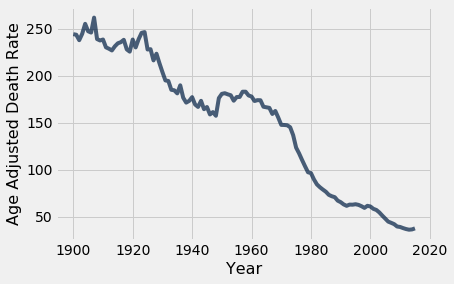

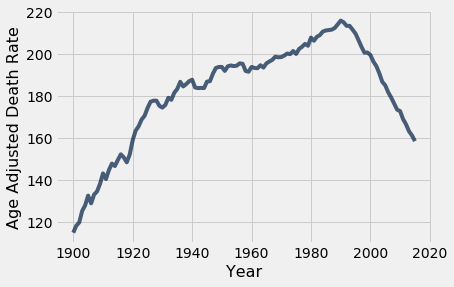

In [5]:
def disease_timeline(disease):
    disease_table = causes_of_death.where("Cause",disease)
    disease_table.plot("Year","Age Adjusted Death Rate")
    
disease_timeline("Stroke")
disease_timeline("Cancer")

We would like to see, over the years, what the deadliest diseases are. In order to do so, we will first determine how many years are present in the dataset. From there, we will see what proportion of years a certain disease ranks first. 

**Question 2:** How many years are present in the dataset? Assign the number to `num_years`. 

In [7]:
num_years = causes_of_death.group("Year").num_rows
num_years

116

In [8]:
_ = ok.grade('q1_2')

**Question 3:** What was the disease with the largest death rate in 1997? If there are multiple, pick either disease. Assign the disease to `deadliest_1997`.

In [10]:
deadliest_1997 = causes_of_death.where("Year",1997).sort("Age Adjusted Death Rate",descending = True).column("Cause").item(0)
deadliest_1997

'Heart Disease'

In [11]:
_ = ok.grade('q1_3')

**Question 4:** Define a function `largest_rate_in_year`, which takes in a specific year and returns the disease with the largest death rate in that year. 

In [12]:
def largest_rate_in_year(year):
    year_table = causes_of_death.where("Year",year)
    return year_table.sort("Age Adjusted Death Rate",descending = True).column("Cause").item(0)

largest_rate_in_year(1997)

'Heart Disease'

In [13]:
_ = ok.grade('q1_4')

**Question 5:** Create a table `largest_rate_diseases`, which contains two columns. The first column is the `Year` column with every distinct year in our original table. The second column is labeled `Deadliest Disease`, which contains the deadliest disease in the corresponding year. 

*Hint:* If you are using a `for` loop, you are likely doing too much work.

*Hint:* You might find your answer for question 2 useful for this first variable below. Try assigning `unique_years` to a table of the unique years in our `causes_of_death` table. 

In [17]:
unique_years = causes_of_death.group("Year").column("Year")
array_of_diseases = causes_of_death.group("Cause").column("Cause")
largest_rate_diseases = ...
largest_rate_diseases

causes_of_death.group("Year")

Year,count
1900,5
1901,5
1902,5
1903,5
1904,5
1905,5
1906,5
1907,5
1908,5
1909,5


In [13]:
_ = ok.grade('q1_5')

**Question 6:** Define the function `prop_deadliest` such that the code that we've given you assigns `proportion_table` to a table with two columns: One is each of the unique deadliest diseases found in the `largest_rate_diseases`, and one is the proportion of years in which that disease was found to be the deadliest.  


In [14]:
def prop_deadliest(arr):
    ...

proportion_table = largest_rate_diseases.group('Deadliest Disease', prop_deadliest)
proportion_table

In [16]:
_ = ok.grade('q1_6')

From the analysis in Section 1, you should have determined that heart disease is the by far the deadliest disease over the last few centuries. Run the following line to see how heart disease's death rate varies over time. 

In [17]:
disease_timeline('Heart Disease')

Let's examine the graph above. You'll see that in the 1960s, the death rate due to heart disease steadily declines. Up until then, the effects of smoking, blood pressure, and cholesterol (among other factors) on the cardiovascular system were unknown to researchers. Once these factors started to be noticed, doctors were able recommend a lifestyle change for at-risk patients to prevent heart attacks and heart problems.

Note, however, that the death rate for heart disease still reigns far above all the death rates of all other causes. Even though the death rate is starkly decreasing, this means that as of 2015, we have not found all of the causes (both direct and indirect) of heart disease. One cause which has eluded researchers is the **consumption of saturated fats**. That will be the focus of the rest of this project.  

## Part 2: Problems with Determining Causality 

Researchers have been wondering for over half a century how saturated fats affect the risk of heart disease. Overall, the hypothesis is extremely simple. Researchers believe that replacing saturated fats with polyunsaturated fats should reduce the risk of cardiovascular disease. The rationale is that this replacement has been shown to reduce serum cholesterol in the body, a type of cholesterol that has shown to be associated with cardiovascular disease.

Researchers in the past have proven causality for certain experiments before, so what makes this situation any different? To display the struggles researchers had in designing this experiment, we will walk through two common experiments that they were recommended to run.

**Experiment 1:** Examine a group of people who eat a diet of primarily saturated fats and butter and a group of people who eat a diet that replaces saturated fats with polyunsaturated fats in certain countries. Study their habits while tracking their mortality rates and cardiovascular issues to look for patterns. This is known as an epidemiological study.  


**Experiment 2:** Get a large group of people, and pair each person with someone else in the group who is as similar to the original person as possible (age, sex, etc.) Label one person as Person A, and label the second person as Person B. Direct all A people to eat a normal diet consisting of saturated fats, but direct all B people to eat a diet with polyunsaturated fats instead. Wait some time, and track their mortality rates. This is known as a clinical trial. 

Note that neither experiment can be run to determine causality between diet and cardiovascular disease. 

**Question 1:** Why can Experiment 1 not be used to determine causality between eating saturated foods and cardiovascular issues? Give **two** specific reasons. 

*Hint:* An example of a possible problem with this experiment can be found when looking at France: https://en.wikipedia.org/wiki/French_paradox. 

*Write your answer here, replacing this text.*

**Question 2:** Why can Experiment 2 not be used to determine causality between eating saturated foods and cardiovascular issues? Give **two** specific reasons. 

*Hint:* In a study like this, the researcher is unable to monitor the eating patterns of the subjects participating once they leave. Secondly, think about when we can call the experiment "over" based on the description above. 

*Write your answer here, replacing this text.*

The issues above are difficult problems, but important ones to think about to combat the number one killer in the world. People thought hard, and it wasn't until the National Diet Heart study hit cities such as Baltimore and Oakland that real progress was made towards creating useful experiments to study causal links. More specifically, though, the issues above were combated meticulously and thoroughly by Ivan Frantz in the Minneseota Study. 

## Part 3: The Minnesota Coronary Experiment

In 1968, Dr. Ivan Frantz was a large proponent of reducing saturated fats to prevent death from heart disease. To see if his hypothesis had merit, he began an extremely careful experiment in Minnesota. His experiment was possibly the most regulated experiment studying the effect of diet on cardiovascular disease. 

In his experiment, Dr. Ivan Frantz tightly controlled the diets of institutionalized study subjects who lived and remained in their institution. In this institution, the subjects were randomly divided into two equal groups: half of the subjects were fed meals cooked with saturated fats, and half of the subjects were fed meals cooked with polyunsaturated fats. For example, the latter groups' oils were replaced with vegetable oils, specifically corn oils, and their butter was replaced with margarine. Notice that the subjects did not know which food they were getting. This is known as a ** blind** study. 

Every detail of this experiment was very carefully executed by Dr. Ivan Frantz. There was a law in Minnesota which required margarine to be cut differently than butter. Dr. Ivan Frantz worked against the legislature to allow them to be cut similarly so that his experiment may remain double blind. 

Despite the level of detail and effort in their study, the results of the study were never extensively examined until the late 21st century. The data was thankfully dug up by Dr. Ivan Frantz's son Dr. Robert Frantz nearly 40 years later in their dusty basement. As one of the most rigorous studies ever run, we have much to learn from Dr. Frantz's data. 

While data on the scale of individuals from the 1968 study is unfortunately unavailable, we do have enough summary information to recreate the data to the best of our abilities. 

In order to test whether eating this new diet actually reduced serum cholesterol levels, we need to create a table with one row for each participant in the study, as well as how their serum cholesterol changed. There were 1179 subjects in the diet group and 1176 subjects in the control group who had their serum cholesterol changes measured. 

The information provided in Dr. Frantz's study is the average percentage change as well as the standard deviation of percentage change for the different subject groups. The average percentage change in serum cholesterol for those in the diet group was -13.8%, with a standard deviation of 13%. For those in the control group, the average percentage change was -1%, with a standard deviation of 14.5%. Using this, we created the data using some standard distribution assumptions and saved them in `serum_cholesterol.csv`. We read this table into `serum_cholesterol` below. 

In [18]:
serum_cholesterol = Table.read_table('serum_cholesterol.csv')
serum_cholesterol

After determining if serum cholesterol is actually lowered by this new diet, we want to see whether or not death rates were reduced as well. The following table is a summarized version of the data collected in the experiment. 

In [19]:
mortality_summary = Table(['Age', 'Condition', 'Total', 'Deaths', 'CHD Deaths']).with_rows([
    ['0-34',  'Diet',    1367, 3, 0],
    ['35-44', 'Diet',    728, 3, 0],
    ['45-54', 'Diet',    767, 14, 4],
    ['55-64', 'Diet',    870, 35, 7],
    ['65+',   'Diet',    953, 190, 42],
    ['0-34',  'Control', 1337, 7, 1],
    ['35-44', 'Control', 731, 4, 1],
    ['45-54', 'Control', 816, 16, 4],
    ['55-64', 'Control', 896, 33, 12],
    ['65+',   'Control', 958, 162, 34],   
])
mortality_summary

**Question 1:** The numbers of deaths in the Deaths column above are not specific to cardiovascular disease. Why is it okay if we just use the total number of deaths instead of the CHD Deaths?

*Write your answer here, replacing this text.*

We are going to work towards expanding our `mortality_summary` table from Dr. Frantz's experiment so that we have one row for every subject in the experiment. Our goal is to put this all into a table called `minnesota_data`.

**Question 2:** How many rows should the `minnesota_data` table have? Assign the value to `num_mn_rows`. 

In [20]:
num_mn_rows = ...
num_mn_rows

In [21]:
_ = ok.grade('q3_2')

**Question 3:** Using all of the notes below, complete the code below to create a table with four columns: "Age", "Condition", "Participated" and "Died". Each row should contain a specific patient and should have their age group and condition as specified in the `mortality_summary` table, a `True` in the "Participated" column since everyone participated in the experiment, and either a `True` or `False` in the "Died" column, depending on if they are alive or dead. 

The total number of rows of `minnesota_data` should be the same as the number of participants summarized in the mortality_summary table. 

*Hint*: The most useful notes from below will be the final three; how to get an item out of a row, passing in just one value into the second argument of `with_column`, and how to iterate over rows. Make sure you use the other two notes to understand what the rest of this code is doing.  

The following few notes will all be helpful to finish and understand the code below: 

* `tbl1.append(tbl2)` adds all of the rows of `tbl2` into `tbl1`, assuming they have the same column names 
* `np.arange(5) < 3` returns the following array: `[True, True, True, False, False]`
* `row.item(x)` returns the item in column `x` in a specific row of a table
*  Assume `tbl` has 10 rows. Then, `tbl.with_column('Num', val)` adds an array of length 10, with each element being val, as a new column of the table. 
*  To iterate over all rows of a table, you can write `for row in tbl.rows:`

In [22]:
minnesota_data = Table(['Age', 'Condition', 'Died', 'Participated'])

for row in ...:
    i = np.arange(0, row.item('Total'))
    t = Table().with_column('Died', i < row.item('Deaths'))
    t = t.with_column('Age', ...)
    t = t.with_column('Condition', ...)
    t = t.with_column('Participated', ...)
    minnesota_data.append(t)

minnesota_data

In [24]:
_ = ok.grade('q3_3')

## Part 4: Running a Hypothesis Test

Now that we have two clean datasets to work with, we can focus on determining causal links. Assuming that these randomized controlled experiments are samples from the larger population, we can work on using the inference techniques discussed so far in the course to answer the following questions: 

* Does changing saturated fats to polyunsaturated fats in a person's diet **change their serum cholestrol levels**? 


* Does changing saturated fats to polyunsaturated fats in a person's diet **affect their risk of cardiovascular disase**? 

### Section 1: Reducing Serum Cholesterol 

First, we want to test whether this new diet changes their serum cholesterol levels. To do so, we will need the `serum_cholesterol` table. Remember that there are two unique values in the 'Condition' column: 'Diet' and 'Control'.

In [25]:
serum_cholesterol

**Question 1:** Describe a null hypothesis and an alternative hypothesis which can help us determine if the new diet has any affect on overall change in serum cholesterol as compared to the control diet. 

**Null Hypothesis:** YOUR ANSWER HERE

**Alternative Hypothesis:** YOUR ANSWER HERE

In order to differentiate between our two hypotheses above, we consider the absolute difference in the average percentage changes between the two groups as our test statistic. 

**Question 2:** Do larger values of the test statistic point towards the  null hypothesis or the alternative hypothesis? Assign `larger_serum_ts` to either 1 if it's the null, or 2 if it's the alternative. 

In [26]:
larger_serum_ts = ...

In [27]:
_ = ok.grade('q4_1_2')

**Question 3:** Define a function `serum_ts_fn` which takes in a table just like `serum_cholesterol` and returns the test statistic of the given data. 

In [28]:
def serum_ts_fn(tbl):
    grouped = tbl.group('Condition', np.mean)
    percent_change_diet = ...
    percent_change_control = ...
    return ...


In [30]:
_ = ok.grade('q4_1_3')

**Question 4:** Assign `observed_serum_ts` to the value of the test statistic on the observed data. 

In [31]:
observed_serum_ts = ...
observed_serum_ts

In [32]:
_ = ok.grade('q4_1_4')

**Question 5:** The next step in our hypothesis test is to simulate the null hypothesis using our data. Describe the steps you would need to do simulate the null hypothesis using our observed data. 

*Write your answer here, replacing this text.*

**Question 6:** Simulate 5000 values of the test statistic by simulating taking a sample under the null hypothesis multiple times and assign this collection of test statistics to `serum_simulated_statistics`. Put the test statistics into a one column table with 5000 rows called `serum_simulated_ts`. 

Note: Your code might take a couple of minutes to run.

In [33]:
serum_simulated_statistics = ...

for ... in ...:
    shuff = ...
    sim_samp = ...
    sim_ts = ...
    serum_simulated_statistics = ...


serum_simulated_ts = Table().with_column('Simulated Test Statistics', ...)

In [35]:
_ = ok.grade('q4_1_6')

The following line plots the histogram of the simulated test statistics, as well as a point for the observed test statistic. Make sure to run it, as it will be graded. 

In [36]:
serum_simulated_ts.hist()
plots.scatter(observed_serum_ts, 0, color='red', s=30)

**Question 7:** Without calculating any p-values, can we officially claim that the change in diet **causes** a larger percentage difference in serum cholesterol levels over time? Explain your answer. 

*Write your answer here, replacing this text.*

### Section 2: Reducing Death Rates

In the previous section, we made a decision on whether dietary change affects the change in serum cholesterol levels. We have not yet, however, explored how the change in diet affects death rates among the subjects. To explore this, we move our attention to the `minnesota_data` table. 

In [35]:
minnesota_data

**Question 1:** Set up a Null Hypothesis and an Alternative Hypothesis which uses our data above to help answer whether or not the different diet causes different rates of death in the two groups. 

**Null Hypothesis:** YOUR ANSWER HERE

**Alternative Hypothesis:** YOUR ANSWER HERE

**Question 2:** Assign `summed_mn_data` to a a table with three columns and two rows. The three columns should be "Condition", "Died sum", and "Participated sum". There should be one row for the Diet group and one row for the Control group, and each row should encode the total number of people who participated in that group and the total number of people who died in that group. 

In [37]:
summed_mn_data = ...
summed_mn_data

In [38]:
_ = ok.grade('q4_2_2')

**Question 3:** In thinking of a test statistic, one researcher decides that the absolute difference in the number of people who died in the control group and the number of people who died in the diet group is a sufficient test statistic. Give one **specific** reason why this test statistic will not work for this example. 

*Write your answer here, replacing this text.*

To combat the problem above, we instead decide to use the the absolute difference in hazard rates between the two groups as our test statistic. The hazard rate is defined as the proportion of people who died in a specific group out of the total number who participated in the study from that group. 

**Question 4** Define a function `hazard_rates` which takes in a row of the table from question 2 (or a table with the same columns), and returns the hazard rate. 

*Hint:* To take a specific columns item out of a `row`, you can do `row.item(column_label)`. 

In [39]:
def hazard_rates(row): 
    return ... 

hazard_rates(summed_mn_data.row(0))

In [41]:
_ = ok.grade('q4_2_4')

**Question 5:** Define a function `rate_differences`, which takes in a table like `summed_mn_data` and returns the absolute differences between the hazard rates of the control group and the diet group. Use it to get the observed test statistic and assign it to `death_rates_ts`. 

In [42]:
def rate_differences(tbl): 
    return ... 

death_rates_ts = ...

In [44]:
_ = ok.grade('q4_2_5')

**Question 6:** We are now in a position to run a hypothesis test to help differentiate between our two hypothesis using our data. Define a function `test` which takes in a table like `minnesota_data`. It simulates samples and calculates the rate differences for these samples under the null hypothesis 500 times, and uses them to return a P-Value with respect to our observed data. 

*Hint:* This is a very long, involved problem. Start by outlining the steps you'll need to execute in this function and address each separately. Small steps and comments are very helpful! You'll be surprised to see you have already written a lot of the useful code!

Note: Your code might take a long time to run.

In [45]:
def test(t): 
    ...

our_p_value = test(minnesota_data)
our_p_value

In [47]:
_ = ok.grade('q4_2_6')

**Question 7:** Using the P-Value above, what can we conclude about if the change in diet causes a difference in death rate? Assume a normal p-value cutoff of .05. 

*Write your answer here, replacing this text.*

## Part 5: Exploring Other Factors

We have made a conclusion based on most of our available data, but we would like to see if our remaining data can help us shed any more insight on our conclusion, or generate any other useful conclusions. Our last piece of useful information is the Age column. 

**Question 1:** Define a function `age_test` which takes in a specific age group, and returns the P-Value of the hypothesis done in section 4.2 but only applied to the participants in the specific age group. 

In [48]:
def age_test(age_group): 
    return ...
    
#Do not change this line 
young_age_test = age_test('0-34')
young_age_test

In [50]:
_ = ok.grade('q5_1')

**Question 2:** Complete the code below which prints out the P-Values of the hypothesis test from section 4.2 for all of the unique age groups in our original data. 

In [51]:
unique_ages = ...

for age_group in unique_ages: 
    p_val = ...
    print("Age Group: ", age_group, " Associated P-Value: ", p_val)
    

The P-Values are extremely variable across the age groups, but notice that the age group of 65+ years actually has a relatively low P-Value. With some common cut-offs, it might even be enough to show that for people of age 65+, replacing saturated fats with unsaturated fats might cause a change in death rates. Let's explore this notion a little bit more. 

If you didn't get a comparatively low P-Value for the 65+ age group, we recommend you retry the question above. 

**Question 3:** What is the observed test statistic for the age group of 65+? Assign it to the variable `obs_65_plus`. 

In [53]:
eldest_group = ...
summed_eldest_group = ...
obs_65_plus = ...
obs_65_plus

In [54]:
_ = ok.grade('q5_3')

**Question 4:** Did the condition group have the larger hazard rate, or did the diet group have a larger hazard rate for the age group 65+? To answer this, assign `signed_rate_difference` to (hazard rate of the diet group for the age group of 65+) - (the hazard rate of the control group for the age group of 65+). Use it to assign `larger_hazard_rate` to either "control" or "diet", depending on which one had the larger hazard rate. 

In [ ]:
hazard_rates_diet = ...
hazard_rates_control = ...

signed_rate_difference = ...

if ...:
    ...
else:
    ...
    
    
signed_rate_difference, larger_hazard_rate

In [56]:
_ = ok.grade('q5_4')

**Question 5:** Is the above result the one you expect? Explain your answer. 

*Write your answer here, replacing this text.*

## Part 6: Conclusion

We've almost made it to the end of this analysis. You, as an investigative data scientist, have explored the world's leading causes of death, identified the largest cause of death known to us in the last century, and looked at one of the most important data sets that explains what leads to that cause of death. We've recreated Dr. Frantz's data, run our own experiments, and examined important external factors. It's now time to reflect on what we've discovered.

**Question 1:** In about 3-5 sentences, explain what you have learned throughout this project. Does replacing saturated fats with unsaturated fats cause a change in serum cholesterol? Does it cause a different death rate? What other factors are important to consider? 

*Write your answer here, replacing this text.*

Congratulations! You have completed your own large scale case study and evaluated one of the most important data sets in determining the causes of cardiovascular disease, one of the largest universal killers! 

Run the next cell to submit the project. 

In [ ]:
_ = ok.submit()